<a href="https://colab.research.google.com/github/GiulianaIslas/ProyectoFinal/blob/main/MexicanHat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEMANA TEC TS1001S Convolucion/Padding


Aqui se ilustra la convolucion. Este tutorial consta de tres pasos.

1. Descargar una imagen
2. Dependencias
3. Aplicar una convolucion



$f(x,y) * g(x,y)$


$g(x,y) = \exp^{\frac{-(x+y)^2}{2}}$

## Descar de Imagen

In [38]:
!gdown https://drive.google.com/uc?id=1cJ_XzTbiIKiuMCraz0ZSgGnByiOOxpYN


Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/gdown/cli.py", line 155, in main
    resume=args.continue_,
  File "/usr/local/lib/python3.7/dist-packages/gdown/download.py", line 148, in download
    res = sess.get(url, headers=headers, stream=True, verify=verify)
  File "/usr/local/lib/python3.7/dist-packages/requests/sessions.py", line 543, in get
    return self.request('GET', url, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/requests/sessions.py", line 530, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python3.7/dist-packages/requests/sessions.py", line 637, in send
    adapter = self.get_adapter(url=request.url)
  File "/usr/local/lib/python3.7/dist-packages/requests/sessions.py", line 728, in get_adapter
    raise InvalidSchema("No connection adapters were found for {!r}".format(url))
requests.exceptions.InvalidSchema: No connection 

In [28]:
!ls -ltr

total 44
drwxr-xr-x 1 root root  4096 Mar 23 14:22 sample_data
-rw-r--r-- 1 root root 39407 Mar 25 02:21 sudoku.png


## Dependencias

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy import ndimage

## Convolucion

Aqui se abre y normaliza la imagen

In [40]:
Is = Image.open('sudoku.png');
I = Is.convert('L');
I = np.asarray(I);
I = I / 255.0;

Seleccionar los kernels y aplicar la convolucion

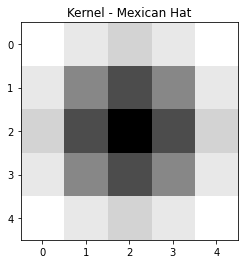

array([[0.00731873, 0.00665543, 0.00603327, 0.00665543, 0.00731873],
       [0.00665543, 0.00387344, 0.00219459, 0.00387344, 0.00665543],
       [0.00603327, 0.00219459, 0.        , 0.00219459, 0.00603327],
       [0.00665543, 0.00387344, 0.00219459, 0.00387344, 0.00665543],
       [0.00731873, 0.00665543, 0.00603327, 0.00665543, 0.00731873]])

In [43]:


def calc_ker(K, sigma, verbose=False):
    #Matriz de ceros
    KR = np.zeros((K,K))

    mitad = K // 2

    for x in range(K):
        for y in range(K):
            X = x - mitad
            Y = y - mitad

            KR[x][y] = (1/(np.pi*sigma**4)) * ((1-(1/2))*((X**2+Y**2)/sigma**2)) * np.exp( - ((X**2+Y**2)/(2*sigma**2)))
    
    plt.imshow(KR, interpolation='none',cmap='gray')
    plt.title("Kernel - Mexican Hat")
    plt.show()
    return KR


calc_ker(5,2)

## Padding

In [14]:
Is = Image.open('sudoku.png'); # imagen del sudo
I = Is.convert('L'); # se convierte a escala de grises
I = numpy.asarray(I); # conversion numerica para poder operar de 0-1
I = I / 255.0; # normalizacion 0 - 1

def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

I = numpy.pad(I, 10, pad_with, padder=0)

M = kernel(sigma, alpha, I, )

kM = numpy.array(M)

k0 = numpy.array([[0,-1,0],[-1,0,1],[0,1,0]])
k1 = numpy.array([[0,0,0],[-1,0,1],[0,0,0]])
k2 = numpy.array([[0,-1,0],[0,0,0],[0,1,0]])

J0 = ndimage.convolve(I, k0, mode='constant', cval=0.0)
J1 = ndimage.convolve(I, k1, mode='constant', cval=0.0)
J2 = ndimage.convolve(I, k2, mode='constant', cval=0.0)

plt.figure(figsize = (20,20))

plt.subplot(3,3,1)
plt.imshow(Is)
plt.xlabel('Input Image')

plt.subplot(3,3,2)
plt.imshow(J0)
plt.xlabel('VH direction')

plt.subplot(3,3,3)
plt.imshow(J1)
plt.xlabel('Horizontal direction')

plt.subplot(3,3,4)
plt.imshow(J2)
plt.xlabel('Vertical direction')

plt.subplot(3,3,5)
plt.imshow(J2)
plt.xlabel('Este es reptido Vertical direction')


#plt.grid(False)
plt.show()

NameError: ignored